# Question 1

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
rand_state = 2314

from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import Callback
from keras.datasets import fashion_mnist
from keras import utils

import pandas as pd


In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# convert our data into a rank 3 tensor
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float64)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(np.float64)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

X_train, X_train_small, y_train, y_train_small = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

## Test Tim's NN

In [9]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

In [10]:
convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
history_callback = convnet.fit(X_train, y_train,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 32s 769us/step - loss: 0.5753 - acc: 0.7950 - val_loss: 0.4398 - val_acc: 0.8452
Epoch 2/20
42000/42000 [==============================] - 32s 763us/step - loss: 0.3768 - acc: 0.8649 - val_loss: 0.3484 - val_acc: 0.8763
Epoch 3/20
42000/42000 [==============================] - 31s 747us/step - loss: 0.3196 - acc: 0.8851 - val_loss: 0.3570 - val_acc: 0.8691
Epoch 4/20
42000/42000 [==============================] - 30s 713us/step - loss: 0.2884 - acc: 0.8955 - val_loss: 0.3043 - val_acc: 0.8909
Epoch 5/20
42000/42000 [==============================] - 32s 755us/step - loss: 0.2572 - acc: 0.9060 - val_loss: 0.2866 - val_acc: 0.8989
Epoch 6/20
42000/42000 [==============================] - 33s 776us/step - loss: 0.2390 - acc: 0.9122 - val_loss: 0.3039 - val_acc: 0.8894
Epoch 7/20
42000/42000 [==============================] - 30s 719us/step - loss: 0.2182 - acc: 0.9190 - val_loss: 0.

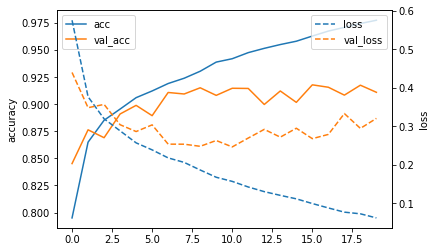

In [12]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss");

### Test Convolution and Dropout layers

In [16]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(16, 6, activation='relu')(input_image)
x = Dropout(0.1)(x)
x = Conv2D(32, 3, activation='relu')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

In [ ]:
convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [19]:
history_callback = convnet.fit(X_train_small, y_train_small,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 7000 samples, validate on 3000 samples
Epoch 1/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.4139 - acc: 0.8506 - val_loss: 0.3936 - val_acc: 0.8610
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.3518 - acc: 0.8727 - val_loss: 0.3874 - val_acc: 0.8630
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.3067 - acc: 0.8859 - val_loss: 0.3882 - val_acc: 0.8627
Epoch 4/20
7000/7000 [==============================] - 9s 1ms/step - loss: 0.2655 - acc: 0.9027 - val_loss: 0.3872 - val_acc: 0.8650
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/step - loss: 0.2535 - acc: 0.9097 - val_loss: 0.3665 - val_acc: 0.8687
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.2150 - acc: 0.9223 - val_loss: 0.3647 - val_acc: 0.8737
Epoch 7/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.1788 - acc: 0.9347 - val_loss: 0.3797 - val_acc: 0.8793
Epoch 8/2

### Add more Dropout layers and reduce nodes

In [20]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(16, 6, activation='relu')(input_image)
x = Dropout(0.2)(x)
x = Conv2D(32, 3, activation='relu')(x)
x = Flatten()(x)
x = Dense(40, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [21]:
history_callback = convnet.fit(X_train_small, y_train_small,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 7000 samples, validate on 3000 samples
Epoch 1/20
7000/7000 [==============================] - 7s 1ms/step - loss: 1.1535 - acc: 0.6100 - val_loss: 0.6810 - val_acc: 0.7690
Epoch 2/20
7000/7000 [==============================] - 6s 912us/step - loss: 0.6999 - acc: 0.7609 - val_loss: 0.5385 - val_acc: 0.8133
Epoch 3/20
7000/7000 [==============================] - 7s 951us/step - loss: 0.5764 - acc: 0.7970 - val_loss: 0.4741 - val_acc: 0.8367
Epoch 4/20
7000/7000 [==============================] - 7s 946us/step - loss: 0.5036 - acc: 0.8214 - val_loss: 0.4606 - val_acc: 0.8430
Epoch 5/20
7000/7000 [==============================] - 7s 935us/step - loss: 0.4660 - acc: 0.8341 - val_loss: 0.4319 - val_acc: 0.8510
Epoch 6/20
7000/7000 [==============================] - 7s 948us/step - loss: 0.4351 - acc: 0.8486 - val_loss: 0.4113 - val_acc: 0.8560
Epoch 7/20
7000/7000 [==============================] - 7s 1ms/step - loss: 0.3900 - acc: 0.8611 - val_loss: 0.3936 - val_acc: 0.8650
Epoc

### Use MaxPool2D but no Conv2D

In [26]:
input_image = Input(shape=(28, 28, 1))
x = MaxPool2D(2, strides=2)(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [27]:
history_callback = convnet.fit(X_train_small, y_train_small,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 7000 samples, validate on 3000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 112us/step - loss: 1.8743 - acc: 0.3687 - val_loss: 1.4143 - val_acc: 0.5390
Epoch 2/20
7000/7000 [==============================] - 0s 53us/step - loss: 1.2876 - acc: 0.5464 - val_loss: 1.0862 - val_acc: 0.6147
Epoch 3/20
7000/7000 [==============================] - 0s 52us/step - loss: 1.0902 - acc: 0.5914 - val_loss: 0.9601 - val_acc: 0.6627
Epoch 4/20
7000/7000 [==============================] - 0s 52us/step - loss: 0.9893 - acc: 0.6246 - val_loss: 0.8977 - val_acc: 0.6697
Epoch 5/20
7000/7000 [==============================] - 1s 76us/step - loss: 0.9330 - acc: 0.6510 - val_loss: 0.8483 - val_acc: 0.6877
Epoch 6/20
7000/7000 [==============================] - 0s 70us/step - loss: 0.8891 - acc: 0.6684 - val_loss: 0.8216 - val_acc: 0.7013
Epoch 7/20
7000/7000 [==============================] - 0s 58us/step - loss: 0.8574 - acc: 0.6713 - val_loss: 0.7924 - val_acc: 0.7123
Epoch 

### Use BatchNormalization and Conv2D

In [28]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(16, 6, activation='relu')(input_image)
x = BatchNormalization()(x)
x = Conv2D(32, 4, activation='relu')(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
history_callback = convnet.fit(X_train_small, y_train_small,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 7000 samples, validate on 3000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.7812 - acc: 0.7251 - val_loss: 0.4909 - val_acc: 0.8287
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.4321 - acc: 0.8439 - val_loss: 0.4374 - val_acc: 0.8380
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.3511 - acc: 0.8693 - val_loss: 0.4007 - val_acc: 0.8540
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.2846 - acc: 0.8913 - val_loss: 0.4046 - val_acc: 0.8613
Epoch 5/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.2285 - acc: 0.9104 - val_loss: 0.3899 - val_acc: 0.8567
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.1896 - acc: 0.9306 - val_loss: 0.4131 - val_acc: 0.8593
Epoch 7/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.1642 - acc: 0.9393 - val_loss: 0.4528 - val_acc: 0.8673
Epoch 8

### Test a network with larger convolutional filters (takes long time to train)

In [30]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(64, 6, activation='relu')(input_image)
x = BatchNormalization()(x)
x = Conv2D(32, 4, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [31]:
history_callback = convnet.fit(X_train_small, y_train_small,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 7000 samples, validate on 3000 samples
Epoch 1/20
7000/7000 [==============================] - 39s 6ms/step - loss: 0.8857 - acc: 0.7229 - val_loss: 0.5480 - val_acc: 0.8103
Epoch 2/20
7000/7000 [==============================] - 38s 5ms/step - loss: 0.4982 - acc: 0.8213 - val_loss: 0.6788 - val_acc: 0.8083
Epoch 3/20
7000/7000 [==============================] - 41s 6ms/step - loss: 0.3916 - acc: 0.8537 - val_loss: 0.4977 - val_acc: 0.8407
Epoch 4/20
7000/7000 [==============================] - 38s 5ms/step - loss: 0.3270 - acc: 0.8799 - val_loss: 0.5175 - val_acc: 0.8293
Epoch 5/20
7000/7000 [==============================] - 37s 5ms/step - loss: 0.2664 - acc: 0.8976 - val_loss: 0.4717 - val_acc: 0.8493
Epoch 6/20
7000/7000 [==============================] - 40s 6ms/step - loss: 0.2359 - acc: 0.9067 - val_loss: 0.4730 - val_acc: 0.8460
Epoch 7/20
7000/7000 [==============================] - 38s 5ms/step - loss: 0.2126 - acc: 0.9167 - val_loss: 0.5423 - val_acc: 0.8500
Epoch 8

In [37]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(36, 6, activation='relu')(input_image)
x = MaxPool2D(3, strides=2)(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [38]:
history_callback = convnet.fit(X_train_small, y_train_small,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 7000 samples, validate on 3000 samples
Epoch 1/20
7000/7000 [==============================] - 7s 1ms/step - loss: 0.7758 - acc: 0.7403 - val_loss: 0.4688 - val_acc: 0.8287
Epoch 2/20
7000/7000 [==============================] - 7s 949us/step - loss: 0.4560 - acc: 0.8344 - val_loss: 0.4271 - val_acc: 0.8437
Epoch 3/20
7000/7000 [==============================] - 7s 1ms/step - loss: 0.3813 - acc: 0.8557 - val_loss: 0.4075 - val_acc: 0.8543
Epoch 4/20
7000/7000 [==============================] - 7s 988us/step - loss: 0.3268 - acc: 0.8764 - val_loss: 0.3758 - val_acc: 0.8723
Epoch 5/20
7000/7000 [==============================] - 6s 905us/step - loss: 0.2959 - acc: 0.8870 - val_loss: 0.3656 - val_acc: 0.8767
Epoch 6/20
7000/7000 [==============================] - 7s 932us/step - loss: 0.2802 - acc: 0.8967 - val_loss: 0.3475 - val_acc: 0.8780
Epoch 7/20
7000/7000 [==============================] - 6s 920us/step - loss: 0.2355 - acc: 0.9081 - val_loss: 0.3510 - val_acc: 0.8773
Epoc

** Conclusion ** The various layers have some effect on the training speed of the NN, however, eventually all the tested solutions overfit the model parameters, even with higher fractions in the Dropuout layers and the accuracy in the test data remains ~ 90%. This was the value also achieved with the dense network. 